In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

dataset = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Winter-2023/Dr Rueda/Dataset/moons1.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

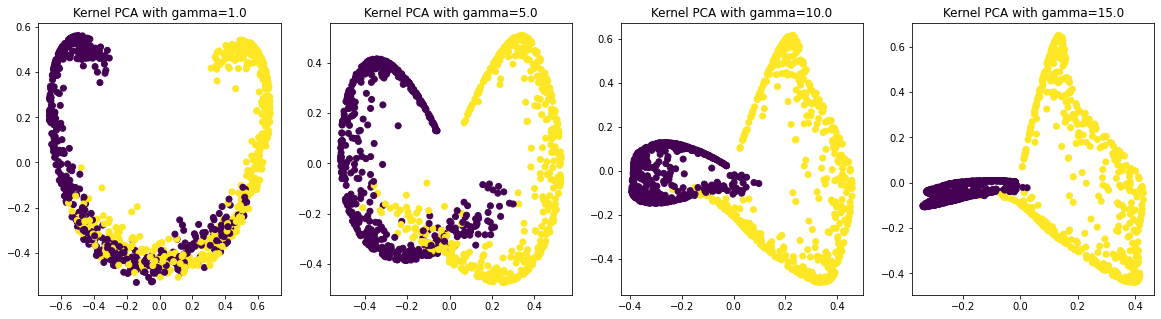

In [ ]:
# perform kernel PCA with different gamma values
gammas = [1,5,10,15]
fig, axes = plt.subplots(1, len(gammas), figsize=(20, 5))

for i, gamma in enumerate(gammas):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X)
    axes[i].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
    axes[i].set_title(f'Kernel PCA with gamma={gamma:.1f}')
    
plt.show()

<ipython-input-5-268341fc4b89>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(X_kpca[mask, 0], X_kpca[mask, 1],
<ipython-input-5-268341fc4b89>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(X_kpca[mask, 0], X_kpca[mask, 1],
<ipython-input-5-268341fc4b89>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(X_kpca[mask, 0], X_kpca[mask, 1],
<ipython-input-5-268341fc4b89>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[i].scatter(X_kpca[mask, 0], X_kpca[mask, 1],


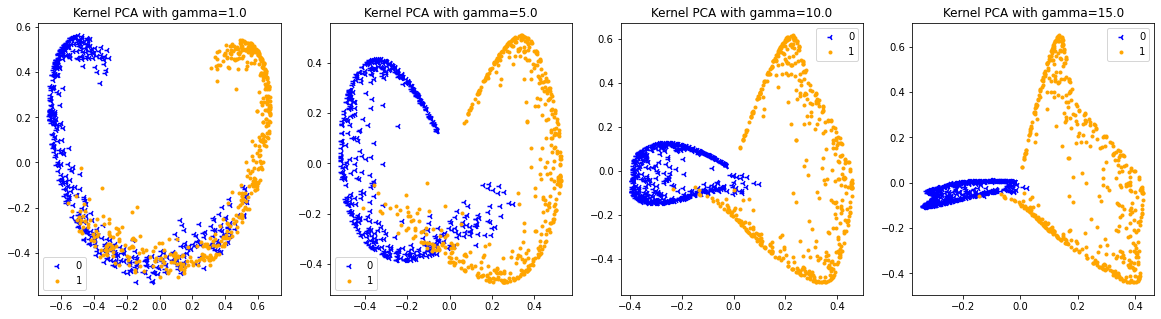

In [ ]:
# perform kernel PCA with different gamma values
gammas = [1,5,10,15]
fig, axes = plt.subplots(1, len(gammas), figsize=(20, 5))

# define marker styles and colors for each type of points
markers = ['3', '.'] # circle and square markers
colors = ['blue', 'orange'] # colors for each type of points

for i, gamma in enumerate(gammas):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X)
    for j, label in enumerate(np.unique(y)):
        mask = y == label
        axes[i].scatter(X_kpca[mask, 0], X_kpca[mask, 1], 
                        c=colors[j], cmap='viridis', 
                        marker=markers[j], label=label)
    axes[i].set_title(f'Kernel PCA with gamma={gamma:.1f}')
    axes[i].legend()

plt.show()


In [ ]:
# perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# perform kernel PCA gamma = 10 (best)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=10)
X_kpca = kpca.fit_transform(X)

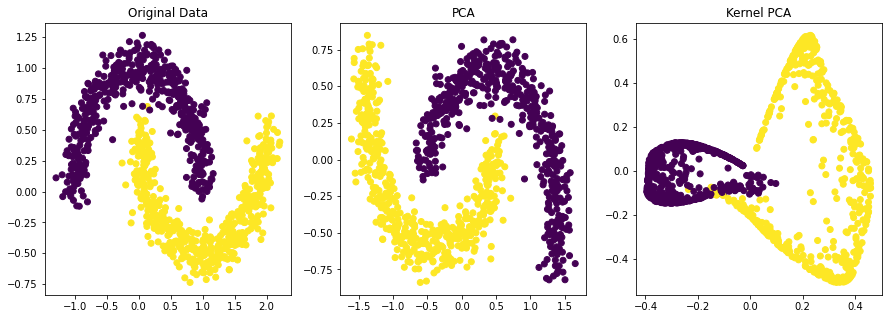

In [ ]:
# plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
axes[0].set_title('Original Data')

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axes[1].set_title('PCA')

axes[2].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis')
axes[2].set_title('Kernel PCA')

plt.show()

<ipython-input-8-38f458d2e4ef>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X[mask, 0], X[mask, 1],
<ipython-input-8-38f458d2e4ef>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1],
<ipython-input-8-38f458d2e4ef>:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[2].scatter(X_kpca[mask, 0], X_kpca[mask, 1],


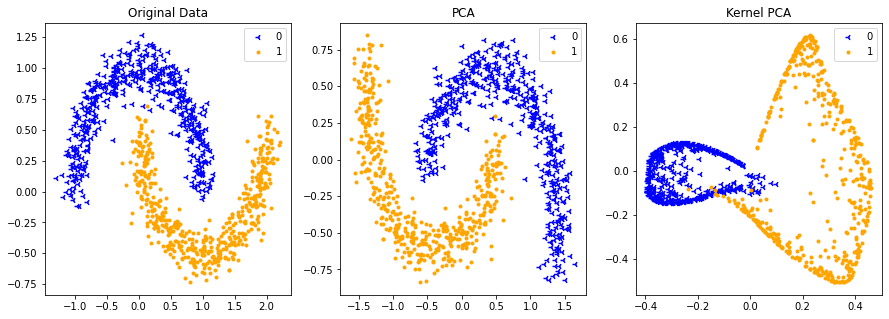

In [ ]:
# define marker styles and colors for each type of points
markers = ['3', '.'] # circle and square markers
colors = ['blue', 'orange'] # colors for each type of points

# plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# plot original data
for j, label in enumerate(np.unique(y)):
    mask = y == label
    axes[0].scatter(X[mask, 0], X[mask, 1], 
                    c=colors[j], cmap='viridis', 
                    marker=markers[j], label=label)
axes[0].set_title('Original Data')
axes[0].legend()

# plot PCA results
for j, label in enumerate(np.unique(y)):
    mask = y == label
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                    c=colors[j], cmap='viridis', 
                    marker=markers[j], label=label)
axes[1].set_title('PCA')
axes[1].legend()

# plot kernel PCA results
for j, label in enumerate(np.unique(y)):
    mask = y == label
    axes[2].scatter(X_kpca[mask, 0], X_kpca[mask, 1], 
                    c=colors[j], cmap='viridis', 
                    marker=markers[j], label=label)
axes[2].set_title('Kernel PCA')
axes[2].legend()

plt.show()


In [ ]:
# apply k-Means to PCA transformed data
kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)
y_kmeans_pca = kmeans_pca.predict(X_pca)

# apply k-Means to kernel PCA transformed data
kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)
y_kmeans_kpca = kmeans_kpca.predict(X_kpca)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


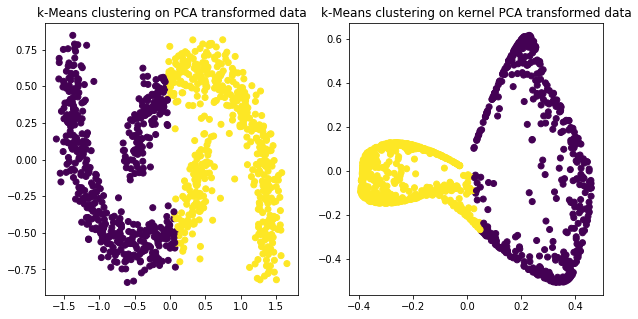

In [ ]:
# plot results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot PCA transformed data
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_pca, cmap='viridis')
axes[0].set_title('k-Means clustering on PCA transformed data')

# plot kernel PCA transformed data
axes[1].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_kmeans_kpca, cmap='viridis')
axes[1].set_title('k-Means clustering on kernel PCA transformed data')

plt.show()

<ipython-input-11-c6ebdf74fe62>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1],
<ipython-input-11-c6ebdf74fe62>:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axes[1].scatter(X_kpca[mask, 0], X_kpca[mask, 1],


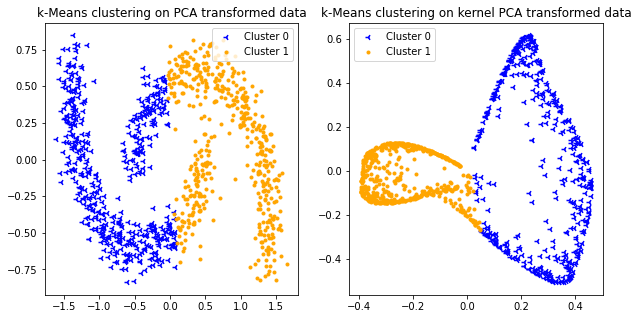

In [ ]:
# define marker styles and colors for each cluster
markers = ['3', '.'] # circle, square, and diamond markers
colors = ['blue', 'orange', 'green'] # colors for each cluster

# plot results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# plot k-Means on PCA transformed data
for j, label in enumerate(np.unique(y_kmeans_pca)):
    mask = y_kmeans_pca == label
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                    c=colors[j], cmap='viridis', 
                    marker=markers[j], label=f'Cluster {label}')
axes[0].set_title('k-Means clustering on PCA transformed data')
axes[0].legend()

# plot k-Means on kernel PCA transformed data
for j, label in enumerate(np.unique(y_kmeans_kpca)):
    mask = y_kmeans_kpca == label
    axes[1].scatter(X_kpca[mask, 0], X_kpca[mask, 1], 
                    c=colors[j], cmap='viridis', 
                    marker=markers[j], label=f'Cluster {label}')
axes[1].set_title('k-Means clustering on kernel PCA transformed data')
axes[1].legend()

plt.show()
